In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [ ]:
from tensorflow import keras as ks
ks.__version__

'3.4.1'

In [ ]:
df = pd.read_csv('/content/classification_ANN_Ex1.csv')
df

cid   R   F           M customer_value
0          1069  19   4   486.00000              M
1          1113  54   4   557.50000              M
2          1250  19   2   791.50000              M
3          1359  87   1   364.00000              L
4          1823  36   3   869.00000              M
...         ...  ..  ..         ...            ...
32261   2179544   1   1  3753.00000              M
32262   2179568   1   1   406.00000              L
32263   2179605   1   1  6001.00000              M
32264   2179643   1   1   887.00000              L
32265  20002000  24  27  1814.62963              H

[32266 rows x 5 columns]

In [ ]:
df['customer_value_trans'] = df['customer_value'].apply(lambda x:0 if x == 'L' else (1 if x == 'M' else 2))
df.head()

cid   R  F      M customer_value  customer_value_trans
0  1069  19  4  486.0              M                     1
1  1113  54  4  557.5              M                     1
2  1250  19  2  791.5              M                     1
3  1359  87  1  364.0              L                     0
4  1823  36  3  869.0              M                     1

In [ ]:
CustomerData = df[['R', 'F', 'M']]
CustomerData.head()

R  F      M
0  19  4  486.0
1  54  4  557.5
2  19  2  791.5
3  87  1  364.0
4  36  3  869.0

In [ ]:
CustomerTarget = df['customer_value_trans']
CustomerTarget[:10]

0    1
1    1
2    1
3    0
4    1
5    2
6    2
7    0
8    0
9    1
Name: customer_value_trans, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_all = MinMaxScaler()
CustomerData_mm = scaler_all.fit_transform(CustomerData)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    CustomerData_mm,
    CustomerTarget,
    train_size = 0.75,
    stratify = CustomerTarget,
    random_state = 42
)

print("X_train: {:.0f}".format(len(X_train)))
print("X_test: {:.0f}".format(len(X_test)))
print("y_train: {:.0f}".format(len(y_train)))
print("y_test: {:.0f}".format(len(y_test)))

X_train: 24199
X_test: 8067
y_train: 24199
y_test: 8067


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
onehot_y = to_categorical(y_train)
onehot_y

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
onehot_y_test = to_categorical(y_test)
onehot_y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim = 3, activation = 'relu'))
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(3, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#此段為補充測試用(可以不執行)
#Keras內建有initializers方法，同樣可以用來固定初始值。但他是用來固定指定神經層的
#權重(weight)和偏移量(bias)，而有些神經層是無法使用initializers的(例如：dropout)，
#所以還是會導致每一次的結果都有不同。但這並不代表Keras的initializers沒有意義。
#可以看到我們針對一個Dense(標準神經層)的Kernel(其實就是weight)和bias做控制。

#參考網址如下：
#https://bc165870081.medium.com/keras-model%E7%9A%84%E5%AF%A6%E9%A9%97%E5%9C%A8%E7%8F%BE%E6%80%A7-f0c926af4634


"""
model_1 = Sequential()
model_1.add(Dense(128, input_dim = 3, kernel_initializer='normal', activation = 'relu'))
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(3, kernel_initializer = 'normal', activation = 'softmax'))
"""

"\nmodel_1 = Sequential()\nmodel_1.add(Dense(128, input_dim = 3, kernel_initializer='normal', activation = 'relu'))\nmodel_1.add(Dense(64, activation = 'relu'))\nmodel_1.add(Dense(3, kernel_initializer = 'normal', activation = 'softmax'))\n"

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,963 (35.01 KB)

 Trainable params: 8,963 (35.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = 'sgd',
                metrics = ['accuracy'])

In [ ]:
history = model_1.fit(x = X_train, y = onehot_y,validation_split = 0.2, epochs = 100, verbose = 2)

Epoch 1/100
605/605 - 6s - 10ms/step - accuracy: 0.4946 - loss: 1.0550 - val_accuracy: 0.5318 - val_loss: 1.0137
Epoch 2/100
605/605 - 2s - 3ms/step - accuracy: 0.5248 - loss: 0.9806 - val_accuracy: 0.5329 - val_loss: 0.9513
Epoch 3/100
605/605 - 2s - 3ms/step - accuracy: 0.5299 - loss: 0.9349 - val_accuracy: 0.5380 - val_loss: 0.9219
Epoch 4/100
605/605 - 1s - 2ms/step - accuracy: 0.5392 - loss: 0.9125 - val_accuracy: 0.5477 - val_loss: 0.9049
Epoch 5/100
605/605 - 2s - 4ms/step - accuracy: 0.5465 - loss: 0.8945 - val_accuracy: 0.5620 - val_loss: 0.8868
Epoch 6/100
605/605 - 3s - 4ms/step - accuracy: 0.5522 - loss: 0.8750 - val_accuracy: 0.5702 - val_loss: 0.8660
Epoch 7/100
605/605 - 1s - 2ms/step - accuracy: 0.5651 - loss: 0.8519 - val_accuracy: 0.5698 - val_loss: 0.8393
Epoch 8/100
605/605 - 1s - 2ms/step - accuracy: 0.5804 - loss: 0.8237 - val_accuracy: 0.5930 - val_loss: 0.8087
Epoch 9/100
605/605 - 2s - 4ms/step - accuracy: 0.6035 - loss: 0.7902 - val_accuracy: 0.6219 - val_loss

In [ ]:
loss, accuracy = model_1.evaluate(X_train, onehot_y, verbose = 0)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy * 100))


Loss: 0.29, Accuracy: 86.58%


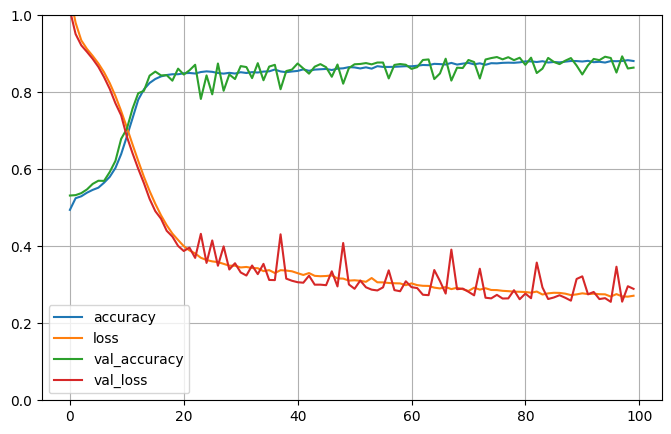

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [ ]:
predictions_1 = model_1.predict(X_test)
predictions_1

253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.6170307e-21, 3.5618044e-08, 1.0000000e+00],
       [9.9368167e-01, 6.3177575e-03, 5.5918048e-07],
       [9.1901672e-01, 8.0971748e-02, 1.1530211e-05],
       ...,
       [9.2259597e-04, 3.3309621e-01, 6.6598117e-01],
       [1.4022882e-01, 8.2878077e-01, 3.0990334e-02],
       [6.7649764e-04, 3.8014698e-01, 6.1917657e-01]], dtype=float32)

In [ ]:
classes_y1 = np.argmax(predictions_1, axis = 1)
classes_y1

array([2, 0, 0, ..., 2, 1, 2])

In [ ]:
loss_test, accuracy_test = model_1.evaluate(X_test, onehot_y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss_test, accuracy_test * 100))

253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.2787

Loss: 0.29, Accuracy: 86.35%


In [ ]:
predictions_unknown = model_1.predict(X_test[:15])
classes_unknown= np.argmax(predictions_unknown, axis = 1)
classes_unknown

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


array([2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1])

In [ ]:
#進階補充(如果已經熟悉上述功能之後再試試看這一段)

#需求:試著使用上面資訊產生混淆矩陣(Confusion Matrix)
"""
from sklearn import metrics
mycm_ANN = metrics.confusion_matrix(y_test, classes_y1)
print('Confusion Matrix: \n', mycm_ANN)
"""

Confusion Matrix: 
 [[2421   81    0]
 [ 527 2117  198]
 [   0  295 2428]]


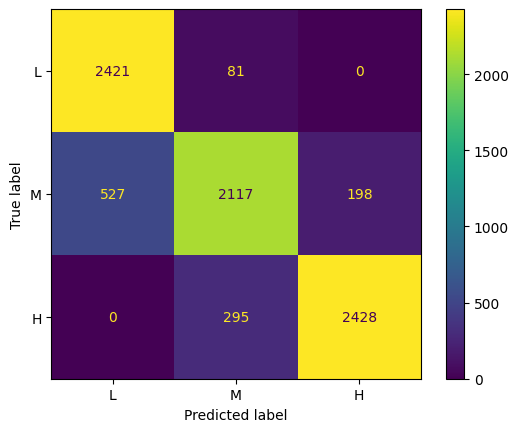

In [ ]:
#使用視覺化方式產生混淆矩陣
"""
A = ['L', 'M', 'H']
metrics.ConfusionMatrixDisplay(confusion_matrix = mycm_ANN, display_labels = A).plot()
"""

In [ ]:
#用Python建立AI深度學習實作時候一個很棒的參考網址
#"30天深度學習-從零到英雄系列"
#https://ithelp.ithome.com.tw/users/20161909/ironman/6079

In [ ]:
#Google真的提供GPU嗎?
#如果各位改使用GPT處理器，可以使用下面指令確認。
#!nvidia-smi

Thu Aug 15 02:51:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0              29W /  70W |    259MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--